In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random as r
import seaborn as sns
from scipy.stats import norm, t, chi2
import scipy.stats as stats
from math import sqrt
import statsmodels.api as sm

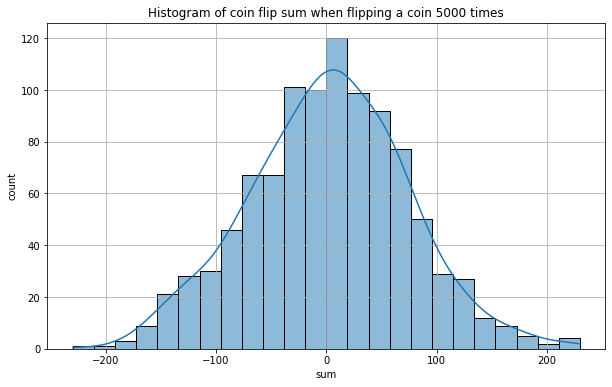

In [2]:

def generate_counts(k=1000,n=100):
    X=2*(np.random.rand(k, n) > 0.5) - 1  #generate a kXn matrix of +-1 random numbers
    S=sum(X)
#     print(S)
    return S

k = 5000
n = 1000
Grph = generate_counts(k = k,n = n)
fig = plt.figure(figsize = [10,6])
# nsssss, bins, patches = plt.hist(Grph)
sns.histplot(x = Grph, kde = True)
# plt.xlim([-k/2,k/2])
plt.xlabel("sum")
plt.ylabel("count")
plt.title("Histogram of coin flip sum when flipping a coin %d times"%k)
plt.grid(True)
plt.show()
# print(Grph)


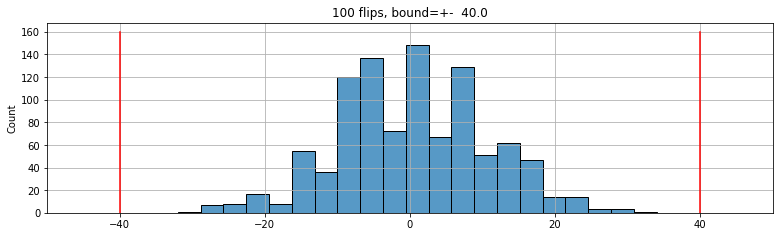

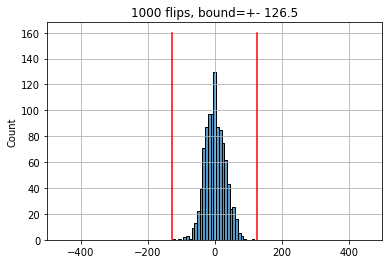

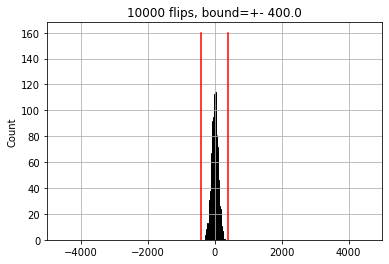

In [3]:
from math import sqrt
k=1000
n=1000
fig = plt.figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts = generate_counts(k = k, n = 1000)
    plt.subplot()#130 + j - 1
    sns.histplot(counts)
#     plt.hist(counts,bins=20);
    plt.xlim([-k/2,k/2])
    d=4*sqrt(k)
    plt.plot([-d,-d],[0,160],'r')
    plt.plot([+d,+d],[0,160],'r')
    plt.grid(True)
    plt.title('%d flips, bound=+-%6.1f'%(k,d))
    plt.show()

In [4]:
from fractions import Fraction
Fraction(3/7*5/9*4/8 + 4/7*4/9*4/8 + 4/7*5/9*4/8).limit_denominator()

Fraction(17, 42)

In [5]:
from itertools import permutations, combinations
# len(list(permutations(range(52), 2)))
Fraction((4*13*12) / len(list(permutations(range(52), 2)))).limit_denominator()

Fraction(4, 17)

In [6]:
s = 'a    b'
s = s.split(' ')
print(' '.join(x.capitalize() for x in s))

A    B


In [7]:
Fraction(4/6).limit_denominator()

Fraction(2, 3)

In [8]:
x = range(3, 7)
x[3]

6

In [9]:
x = np.array([1, 2])
y = np.array([3, 5])
np.dot(x, y)

13

In [10]:
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер генеральной совокупность
sp_size = 100000
# sp - Statistical population - генеральная дсовокупность
sp = pd.Series(dtype = np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

<AxesSubplot:ylabel='Count'>

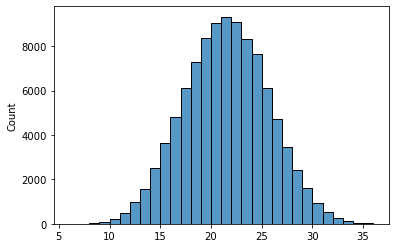

In [11]:
sns.histplot(data = sp, binwidth = 1)

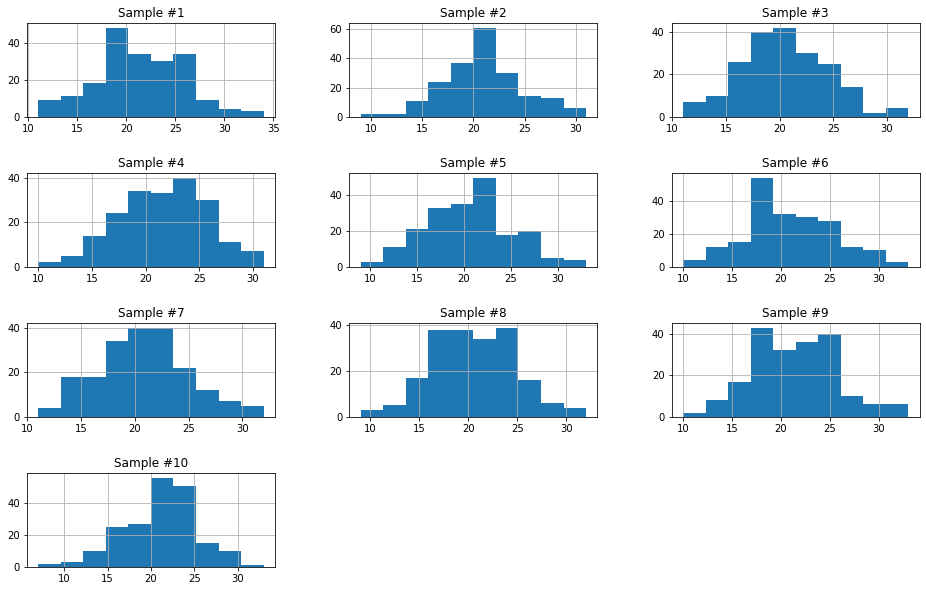

In [12]:
sample_size = 200
samples_count = 10

df = pd.DataFrame([np.random.choice(sp, size = sample_size) for _ in range(samples_count)]).T
df.columns = list(('Sample #' + str(i)) for i in range(1, samples_count + 1))
df.hist(figsize = (16,10))
plt.subplots_adjust(hspace=0.6)

In [13]:
p = 0.05
alpha = 1 - p / 2
print(f'{norm.ppf(alpha) = :.2f}')

norm.ppf(alpha) = 1.96


In [16]:
'''Рассчитайте 99% доверительный интервал для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100
'''
alpha = 0.01
mean = 10
std = 5
n = 100
se = std/n**0.5
p = 1 - alpha / 2
z = norm.ppf(p)

print(np.around([mean - se *z, mean + se * z], 2))

[ 8.71 11.29]


(-6.0, 6.0)

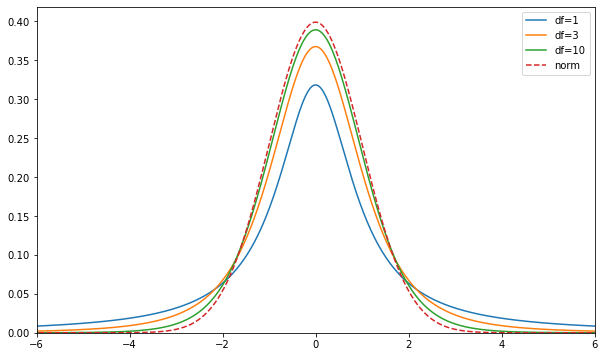

In [2]:
x = np.linspace(-10, 10, 1000)
y_t = [t.pdf(x, df = i) for i in [1, 3, 10]]
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
for Y in y_t:
    plt.plot(x, Y)
plt.plot(x, y, '--')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.ylim(bottom = 0)
plt.xlim(-6, 6)

In [8]:
array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку

df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}) 
df = df.agg(['mean', 'std', 'count', 'sem']).transpose()
df.columns = ['Mean', 'Std', 'N', 'SE']

# df = pd.DataFrame({'Выборка1':array1, 'Выборка2':array2}).agg(['mean','std','count','sem']).transpose()
# df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
a = 0.05
p = 0.95
K = t.ppf(1 - a/2, df = df['N']-1)
L = t.ppf((1 + p)/2, df['N']-1)
# No loc and Scale is used here for simplicity, could get 'interval' values by .ppf(..., loc = , scale = )

df['Interval'] = K * df['SE']
df['Interval?'] = L * df['SE']

df

,Mean,Std,N,SE,Interval,Interval?
Выборка1,100.815,10.246503,20.0,2.291188,4.795511,4.795511
Выборка2,75.735,15.458102,20.0,3.456537,7.234614,7.234614


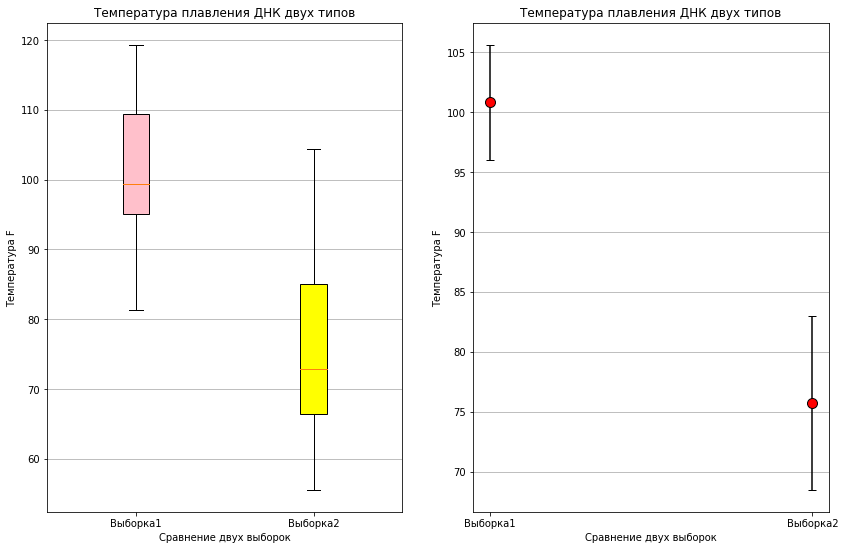

In [42]:
#строим графики, boxplot из изначальных данных array1, array2,  доверительные интервалы из датафрейма df
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert = True,  # создаем вертикальные боксы
                     patch_artist = True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка1', 'Выборка2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mean'], yerr=df['Interval'],\
                      color="black", capsize=4, marker="o", markersize=10, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'yellow']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

In [4]:
'''Рассчитайте доверительный интервал основываясь 
на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:'''
mean = 89.9
sd = 11.3
n = 20
a = 0.05
l = t.ppf(1 - a/2, df = n - 1)
a, b = (mean - l * sd / n ** 0.5, mean + l * sd / n ** 0.5)
print(f'[{a :.2f}, {b :.2f}]')

[84.61, 95.19]


In [11]:
'''Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы 
демонстрируют распределение возраста 
победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий
проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами статистически достоверными.'''
mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100
a = 0.05

se = sqrt((sd_m ** 2)/N + (sd_f ** 2)/N)
t_value = (mean_m - mean_f)/se

p = t.sf(t_value, N-2)
t_cr = t.ppf(1 - a/2, df = N - 1)
print(f'{t_value = }, {t_cr = }')
if t_value > t_cr:
    print('Нулевая гипотеза отвергается')
else:
    print('Нулевая гипотеза принимается(не отвергается)')
# print(f'p={p}')
# if p >= 0.05:
#     print('Мы НЕ можем отклонить нулевую гипотезу')
# else:
#     print('Мы можем отклонить нулевую гипотезу')

t_value = 8.176235608718828, t_cr = 1.9842169515086827
Нулевая гипотеза отвергается


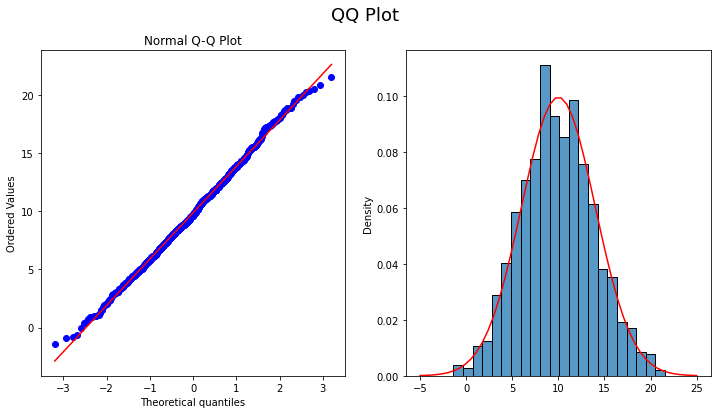

In [99]:
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
# count, bins, _ = plt.hist(sequence, 25, density=False)
sns.histplot(ax = ax2, x = sequence, stat = 'density')
bins = np.linspace(-5, 25)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

ax2.plot(bins, p_x, color='r')
# sns.histplot(sequence, ax = ax2, kde = True, line_kws = {'color' : 'g'})
 

plt.show()

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


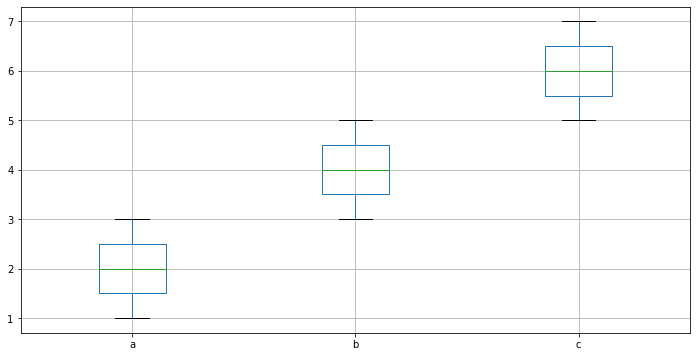

In [113]:
# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

In [126]:
'''Демонстрация работы ковариации и корреляции'''
def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res

In [127]:
x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

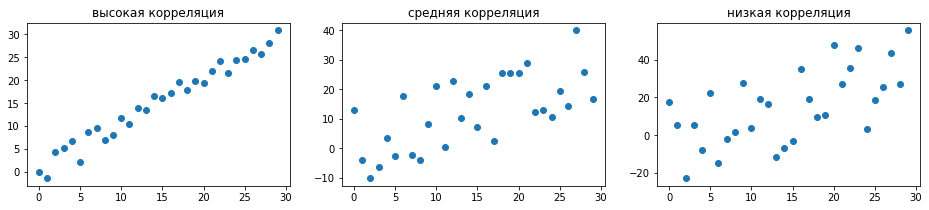

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title('высокая корреляция')
ax2.set_title('средняя корреляция')
ax3.set_title('низкая корреляция')
plt.show()

In [134]:
print(f'''
cov1: {cov(x, y):.2f}
cov2: {cov(x, y1):.2f}
cov3: {cov(x, y2):.2f}

cor1: {cor(x, y):.2f}
cor2: {cor(x, y1):.2f}
cor3: {cor(x, y2):.2f}
''')


cov1: 76.56
cov2: 70.89
cov3: 108.79

cor1: 0.98
cor2: 0.66
cor3: 0.62



In [136]:
df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


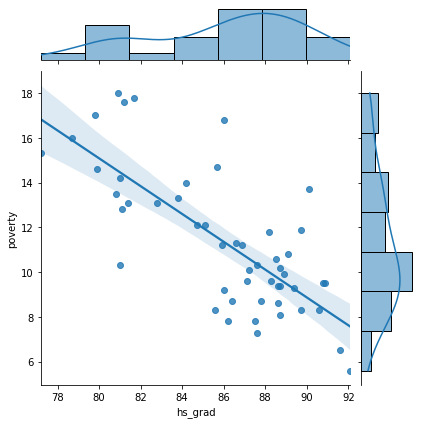

In [146]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg')

In [148]:
df_descr = df.describe().transpose()
df_descr

,count,mean,std,min,25%,50%,75%,max
metro_res,51.0,72.249020,15.275894,38.2,60.80,71.6,86.80,100.0
white,51.0,81.719608,13.897223,25.9,76.80,85.4,90.25,97.1
hs_grad,51.0,86.011765,3.725998,77.2,83.30,86.9,88.70,92.1
poverty,51.0,11.349020,3.099185,5.6,9.25,10.6,13.40,18.0
female_house,51.0,11.633333,2.356155,7.8,9.55,11.8,12.65,18.9


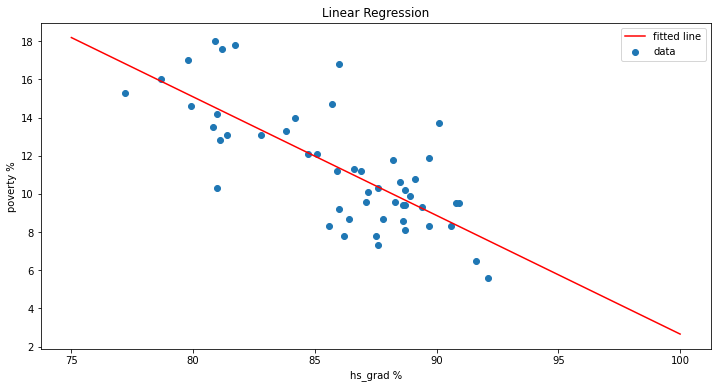

0.07901647100179277


In [158]:
'''Построим модель'''
from scipy.stats import linregress

result =  linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)

reg = lambda x: result.intercept + result.slope*x
plt.scatter(df['hs_grad'], df['poverty'], label='data')
plt.xlabel('hs_grad %')
plt.ylabel('poverty %')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()

In [161]:
print(f'''
slope = {result.slope:.2f}
intercept = {result.intercept:.2f}
r = {result.rvalue:.2f}
r squared = {(result.rvalue ** 2):.2f}
p = {result.pvalue:.5f}
std_err = {result.stderr:.3f}
''')


slope = -0.62
intercept = 64.78
r = -0.75
r squared = 0.56
p = 0.00000
std_err = 0.079



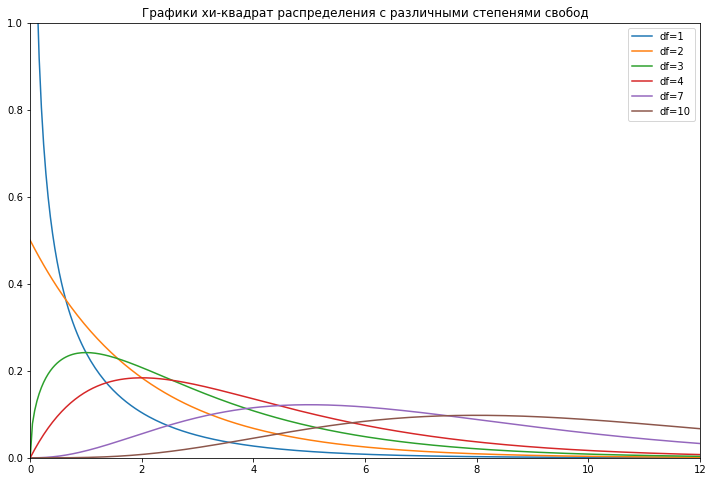

In [12]:
plt.figure(figsize = (12, 8))

x = np.linspace(0, 12, 300)
# степеня свободы
df_set = {1, 2, 3, 4, 7, 10}

for df in df_set:
    y = chi2.pdf(x, df=df)
    plt.plot(x, y, label=f'df={df}')

plt.title('Графики хи-квадрат распределения с различными степенями свобод')
plt.legend()
plt.ylim(top = 1, bottom = 0)
plt.xlim(0, 12)
plt.show()

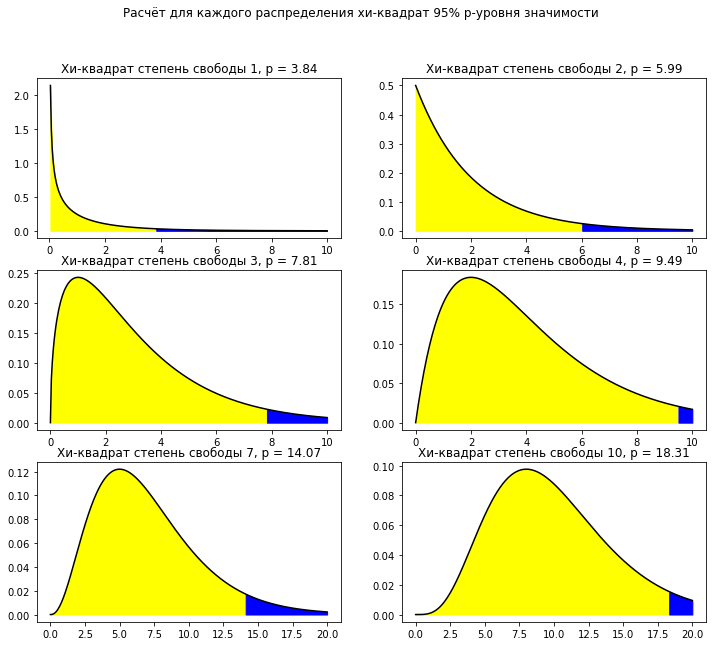

In [35]:
plt.rcParams["figure.figsize"] = (12, 10)

p = 0.95
x1 = np.linspace(0, 10, 300)
x2 = np.linspace(0, 20, 300)

fig, axs = plt.subplots(nrows=3, ncols=2)
axs =  axs.flat

for i, df in enumerate(df_set):
    chi_value = chi2.isf(1-p, df=df)
    x = x1 if df <= 4 else x2
    y = chi2.pdf(x, df=df)
    
    
    axs[i].set_title(f'Хи-квадрат степень свободы {df}, p = {chi_value:.2f}')
    axs[i].plot(x, y, color='k')
    left_x, right_x = x <= chi_value, x >= chi_value
    axs[i].fill_between(x[left_x], y[left_x], color='yellow')
    axs[i].fill_between(x[right_x], y[right_x], color='blue')
    


fig.suptitle('Расчёт для каждого распределения хи-квадрат 95% p-уровня значимости')
plt.show()

In [37]:
'''Какая доля наблюдений лежит в диапазоне от 2 до 4 у распределения хи-квадрат с двумя степенями свободы?'''
print(chi2.cdf(4, df = 2) - chi2.cdf(2, df = 2))

0.23254415793482963


In [64]:
observed = np.array([12, 20, 15, 15, 12, 4])

def chi_value(observed):
    # e - expected
    e = np.mean(observed)
    return sum([((o - e)**2)/e for o in observed])

p = chi2.sf(chi_value(observed), df=(observed.size-1))
print(chi2.ppf(0.975, df = observed.size - 1), chi_value(observed))
print(f'{p:.4f}')

12.832501994030027 10.76923076923077
0.0562


In [71]:
'''При помощи теста хи-квадрат проверьте нулевую гипотезу о том, что в генеральной
совокупности распределение отношения к поступку Сноудена является равномерным, то есть 50 на 50.'''
n=1500
observed = np.array([0.53*n, 0.47*n], dtype='int32')
p = chi2.sf(chi_value(observed), df=observed.size-1)
print(f'{p:.4f}')

0.0201


### Use of `proportions_ztest()` from `statsmodels`

Note the argument `alternative="larger"` indicating a one-sided test. The function returns two values - the z-statistic and the corresponding p-value.

In [3]:
n = 1018
pnull = .52
phat = .56
sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

(2.571067795759113, 0.005069273865860533)

**Populations**: All parents of black children age 6-18 and all parents of Hispanic children age 6-18  
**Parameter of Interest**: p1 - p2, where p1 = black and p2 = hispanic  

**Null Hypothesis:** p1 - p2 = 0  
**Alternative Hypthosis:** p1 - p2 $\neq$ = 0
**Data**: 247 Parents of Black Children. 36.8% of parents report that their child has had some swimming lessons. 
<br>308 Parents of Hispanic Children. 38.9% of parents report that their child has had some swimming lessons.
Difference in population proportion needs t-test. The function returns three values: (a) test statisic, (b) p-value of the t-test, and (c) degrees of freedom used in the t-test.

In [30]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)
print(sm.stats.ttest_ind(population1, population2), 'from statsmodels')
print(stats.ttest_ind(population1, population2))

(-0.7997683872083351, 0.4241884064799194, 553.0) from statsmodels
Ttest_indResult(statistic=-0.7997683872083353, pvalue=0.4241884064799195)


**Population**: All adults  
**Parameter of Interest**: $\mu$, population mean cartwheel distance.

**Null Hypothesis:** $\mu$ = 80 
<br>**Alternative Hypthosis**: $\mu$ > 80

**Data**:
<br>25 adult participants. 
<br>$\mu = 83.84$
<br>$\sigma = 10.72$

In [34]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])
print(sm.stats.ztest(cwdata, value = 80, alternative = "larger"))
print(stats.ttest_1samp(cwdata, 80, alternative='greater'))

(1.756973189172546, 0.039461189601168366)
Ttest_1sampResult(statistic=1.756973189172546, pvalue=0.045837428494522534)
